In [1]:
import numpy as np
import time
from numpy.random import choice
from random import random
import pickle
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

need to measure then entangle for these one or two point probes?
measure, then Bell pair (hadamard and CNOT)
measure, then CNOT

# one-point order parameter

In [8]:
import matplotlib as mpl
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Dark2.colors)

In [ ]:
L = 32
# ps1 = [0.05, 0.1, 0.12, 0.13, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.19, 0.2, 0.25]  
# ps2 = [0.152, 0.154, 0.156, 0.158, 0.162, 0.164, 0.166, 0.168]
# ps = np.sort(ps1+ps2)
ps = [0.05, 0.1, 0.12, 0.13, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.19, 0.2, 0.25] 
ps = [0.05, 0.1, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.25] 

refAs_fin = np.empty(len(ps))

plt.figure(figsize=(9,6))

for i in range(len(ps)):
    infile = open('probe_1pt/L' + str(L) + '_p' + str(ps[i]), 'rb')
    refAs = pickle.load(infile)
    #print(refAs.shape)
    refAs_fin[i] = np.mean(refAs, axis=0)[-1]
    plt.plot(np.mean(refAs, axis=0))
plt.legend(ps)
plt.xlabel('timestep', fontsize=12)
plt.ylabel(r'$\langle S_{probe} \rangle$', fontsize=12)
plt.xticks(np.arange(0,2*L,10), np.arange(0,L,5))
# plt.savefig('fig_probe1pt_L32.pdf')
plt.show()

refAs_fin32 = refAs_fin

In [ ]:
L = 64
# ps1 = [0.05, 0.1, 0.12, 0.13, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.19, 0.2, 0.25]  
# ps2 = [0.152, 0.154, 0.156, 0.158, 0.162, 0.164, 0.166, 0.168]
# ps = np.sort(ps1+ps2)
ps = [0.05, 0.1, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.25] 

refAs_fin = np.empty(len(ps))

plt.figure(figsize=(9,6))

for i in range(len(ps)):
    infile = open('probe_1pt/L' + str(L) + '_p' + str(ps[i]), 'rb')
    refAs = pickle.load(infile)
    #print(refAs.shape)
    refAs_fin[i] = np.mean(refAs, axis=0)[-1]
    plt.plot(np.mean(refAs, axis=0))
plt.legend(ps)
plt.xlabel('timestep', fontsize=12)
plt.ylabel(r'$\langle S_{probe} \rangle$', fontsize=12)
plt.xticks(np.arange(0,2*L,10), np.arange(0,L,5))
# plt.savefig('fig_probe1pt_L64.pdf')
plt.show()

refAs_fin64 = refAs_fin

In [ ]:
L = 128
# leave out 0.155?
# ps1 = [0.05, 0.1, 0.12, 0.13, 0.14, 0.145, 0.15, 0.16, 0.165, 0.17, 0.175, 0.18, 0.19, 0.2, 0.25]  
# ps2 = [0.152, 0.154, 0.156, 0.158, 0.162, 0.164, 0.166, 0.168]
# ps128 = np.sort(ps1+ps2)
ps = [0.05, 0.1, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.25] 

refAs_fin = np.empty(len(ps))

plt.figure(figsize=(9,6))

for i in range(len(ps)):
    infile = open('probe_1pt/L' + str(L) + '_p' + str(ps[i]), 'rb')
    refAs = pickle.load(infile)
    #print(refAs.shape)
    refAs_fin[i] = np.mean(refAs, axis=0)[-1]
    plt.plot(np.mean(refAs, axis=0))
plt.legend(ps)
plt.xlabel('timestep', fontsize=12)
plt.ylabel(r'$\langle S_{probe} \rangle$', fontsize=12)
plt.xticks(np.arange(0,2*L,20), np.arange(0,L,10))

# plt.savefig('fig_probe1pt_L128.pdf')

refAs_fin128 = refAs_fin
ps128 = ps

In [ ]:
import matplotlib as mpl
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Dark2.colors)
plt.figure(figsize=(9,6))
linewidth = 2
markersize = 10
plt.plot(ps, refAs_fin32, '.-', linewidth=linewidth, markersize=markersize)
plt.plot(ps, refAs_fin64, '.-', linewidth=linewidth, markersize=markersize)
plt.plot(ps128, refAs_fin128, '.-', linewidth=linewidth, markersize=markersize)
plt.axvline(x=0.158, linestyle='--', color='k', alpha=0.5, linewidth=linewidth)
plt.xlabel('p', fontsize=16)
plt.ylabel(r'$\langle S_{probe} \rangle$', fontsize=16)
plt.legend(['L=32', 'L=64', 'L=128'], fontsize=16)
# plt.savefig('fig_probe1pt.pdf')

# two-point correlation

In [39]:
L = 128
ps = [0.14, 0.15, 0.17, 0.18, 0.25, 0.3]

reps = 10
for i in range(len(ps)):
    data_agg = np.empty((3,0,8*L))
    for j in range(reps):
        infile = open('temp4/L' + str(L) + '_p' + str(ps[i]) + '_rep' + str(j+1), 'rb')
        data = np.array(pickle.load(infile))
        infile.close()
        data_agg = np.hstack((data_agg, data))
    print(data_agg.shape)
    outfile = open('temp4/L' + str(L) + '_p' + str(ps[i]), 'wb')
    pickle.dump(data_agg, outfile)
    outfile.close()

In [ ]:
L = 128
# ps = [0.05, 0.1, 0.14, 0.15, 0.16, 0.17, 0.18, 0.2, 0.25, 0.3, 0.35]
ps = [0.05, 0.1, 0.14, 0.15, 0.16, 0.17, 0.18, 0.2, 0.25, 0.3]

directory = 'probe_2pt'
plt.figure(figsize=(10,6))
for p in ps:
    infile = open(directory + '/L' + str(L) + '_p' + str(p), 'rb')
    refAs, refBs, refABs = pickle.load(infile)
    infile.close()    
    plt.plot(np.mean(refAs + refBs - refABs, axis=0)[:2*L])
plt.legend(ps)
plt.xlabel('timestep')
# plt.xticks(np.arange(L), np.arange(L))
plt.title('mutual information of two-point probe vs. time, L=' + str(L))

In [ ]:
L = 64
ps = [0.05, 0.1, 0.14, 0.15, 0.16, 0.17, 0.18, 0.2, 0.25, 0.3, 0.35]

directory = 'probe_2pt'
plt.figure(figsize=(10,6))
for p in ps:
    infile = open(directory + '/L' + str(L) + '_p' + str(p), 'rb')
    refAs, refBs, refABs = pickle.load(infile)
    infile.close()
    plt.plot(np.mean(refAs + refBs - refABs, axis=0)[:2*L])
plt.legend(ps)
plt.xlabel('timestep')
plt.title('mutual information of two-point probe vs. time, L=' + str(L))

In [ ]:
L = 32
ps = [0.05, 0.1, 0.14, 0.15, 0.16, 0.17, 0.18, 0.2, 0.25, 0.3, 0.35]
# ps = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]

directory = 'probe_2pt'
plt.figure(figsize=(10,6))
for p in ps:
    infile = open(directory + '/L' + str(L) + '_p' + str(p), 'rb')
    refAs, refBs, refABs = pickle.load(infile)
    infile.close()
    #plt.plot(np.mean(refAs + refBs - refABs, axis=0)[:2*L])
    plt.plot(np.mean(refAs + refBs - refABs, axis=0))
plt.legend(ps)
plt.xlabel('timestep')
plt.title('mutual information of two-point probe vs. time, L=' + str(L))

# tripartite mutual info

In [ ]:
reps = 10
L = 32
directory = 'tmi_wide'

ps = np.arange(0.0,0.25,0.01)
data_agg = np.empty((len(ps),0,2))
# data_agg = np.empty((len(ps),0))

for i in range(reps):
    infile = open(directory + '/tmi_L' + str(L) + '_rep' + str(i+1), 'rb')
    data = pickle.load(infile)
    infile.close()
    data_agg = np.hstack((data_agg, data))

print(data_agg.shape)

outfile = open(directory + '/tmi_L' + str(L), 'wb')
pickle.dump(data_agg, outfile)

outfile.close()

In [ ]:
directory = 'tmi_nearpc' # average after second last gates and last gates
Ls = [16,20,32,48]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ps = np.arange(0.13,0.19,0.0025)

# there is not much difference between estimate after the last layer of gates and after the second last
# last layer of gates. this is because we only studied divisible by 4 system sizes for which every tripartite 
# cut goes through the same kind of geometry
# however, measuring after the last layer of gates vs. last layer of measurements is significant

pc = 0.157
nu = 1.2

for L in Ls:
    
    infile = open(directory + '/tmi_L' + str(L), 'rb')
    data = pickle.load(infile)
    infile.close()
    print(data.shape)
    
    ax1.plot(ps, np.mean(np.mean(data,axis=1),axis=1), '.-')
    
    ax2.plot((ps-pc)*L**(1/nu), np.mean(np.mean(data,axis=1),axis=1), '.')
    
    if L==24:
        data24 = data.copy()

ax1.axvline(x=pc, color='k', linestyle='--', alpha=0.7)
ax1.legend(Ls)
ax1.set_xlabel(r'p')
ax1.set_ylabel(r'$I_3(A:B:C)$')
ax2.legend(Ls)
ax2.set_xlabel(r'$(p-p_c)L^{1/\nu}$')
ax2.set_ylabel(r'$I_3(A:B:C)$')

ax1.legend([1,2,3,4])

# plt.savefig('fig_tmi_near.pdf')

In [ ]:
# widerange

ps = np.arange(0,0.25,0.01)
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 12})

directory = 'tmi_wide'
Ls = [16,20,24,32]

pc = 0.158
nu = 1.5
    
for L in Ls:
    
    infile = open(directory + '/tmi_L' + str(L), 'rb')
    data = pickle.load(infile)
    infile.close()
    print(data.shape)
    
    plt.plot(ps, np.mean(np.mean(data,axis=1),axis=1), '.-')

plt.legend(Ls)
plt.xlabel(r'p')
plt.ylabel(r'$I_3(A:B:C)$')

plt.savefig('fig_tmi_wide.pdf')

In [ ]:
# widerange

ps = np.arange(0,0.25,0.01)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# directory = 'clutter/tmi_1d_aftergates_rerun'
# Ls = [12,16,20,24,32]

# directory = 'clutter/tmi_widerange'
# Ls = [12,16,20]

directory = 'tmi_wide'
Ls = [16,20,24,32]

pc = 0.158
nu = 1.5
    
for L in Ls:
    
    infile = open(directory + '/tmi_L' + str(L), 'rb')
    data = pickle.load(infile)
    infile.close()
    print(data.shape)
    
    ax1.plot(ps, np.mean(np.mean(data,axis=1),axis=1), '.-')
    
    ax2.plot((ps-pc)*L**(1/nu), np.mean(np.mean(data,axis=1),axis=1), '.')

ax1.legend(Ls)
ax1.set_xlabel(r'p')
ax1.set_ylabel('TMI')
ax2.legend(Ls)
ax2.set_xlabel(r'$(p-p_c)L^{1/\nu}$')
ax2.set_ylabel('TMI')

# plt.savefig('fig_tmi_wide.pdf')

In [203]:
from scipy import interpolate

def closeness(x1, y1, x2):
    tck = interpolate.splrep(x1, y1, s=0)
    y2 = interpolate.splev(x2, tck, der=0)
    return y2

def fit_exp(ps, pc, nu, L1, L2, data1, data2):
    x1 = (ps-pc)*L1**(1/nu)
    x2 = (ps-pc)*L2**(1/nu)
    y2 = closeness(x1, data1, x2)
    return np.sum(np.square(data2-y2))

pcs = np.arange(0.157, 0.16, 0.0002)
nus = np.arange(1.52,1.8,0.02)

diffs = np.zeros((len(pcs), len(nus)))

for i in range(len(pcs)):
    for j in range(len(nus)):
        diffs[i,j] = fit_exp(ps, pcs[i], nus[j], 32, 24, np.mean(data,axis=1), np.mean(data24,axis=1))
        

In [ ]:
plt.figure(figsize=(20,5))
plt.imshow(diffs)
plt.xticks(np.arange(len(nus)), np.round(nus,2))
plt.yticks(np.arange(len(pcs)), np.round(pcs,4))
plt.colorbar()

In [ ]:
xnew, ynew = closeness(ps, 24, np.mean(data,axis=1), 20, pc, nu)
# plt.plot((ps-pc)*24**(1/nu), np.mean(data,axis=1), '.')
plt.plot(xnew, ynew, '.')
plt.plot(xnew, np.mean(data20,axis=1), '.')

# pbc  (single cut)

In [5]:
L = 512
ps = [0.0, 0.05, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.25, 0.3]

reps = 10
for i in range(len(ps)):
    data_agg = np.empty((0,L))
    for j in range(reps):
        infile = open('temp3/L' + str(L) + '_p' + str(ps[i]) + '_rep' + str(j+1), 'rb')
        data = pickle.load(infile)
        infile.close()
        data_agg = np.vstack((data_agg, data))
    print(data_agg.shape)
    outfile = open('temp1/L' + str(L) + '_p' + str(ps[i]), 'wb')
    pickle.dump(data_agg, outfile)
    outfile.close()

In [2]:
Ls = [8, 16, 32, 64, 128, 256, 512]
ps = [0.0, 0.05, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.25, 0.3]

ents_1d = np.zeros((len(Ls), len(ps)), dtype='float64')
#ents_1d_std = np.zeros((len(Ls), len(ps)), dtype='float64')
for i in range(len(Ls)):
    for j in range(len(ps)):
        infile = open('ent_1d_pbc/L' + str(Ls[i]) + '_p' + str(ps[j]), 'rb')
        ent = pickle.load(infile)
        #print(Ls[i], ps[j], ent.shape)
        infile.close()
        ents_1d[i,j] = np.mean(np.mean(ent, axis=0)[-Ls[i]//6:])
        #ents_1d_std[i,j] = np.std(np.mean(ent, axis=0)[-Ls[i]//6:])

ents_1d_density = ents_1d / np.array(Ls)[:, None]

In [ ]:
import matplotlib as mpl
# go here to get colourmaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20c.colors)

plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 12})
plt.loglog(Ls, ents_1d, '.-')
plt.xlabel('L')
plt.ylabel('S(L/2)')
plt.legend(ps)
plt.xticks(Ls, Ls)
# plt.savefig('fig_ent1D.pdf')

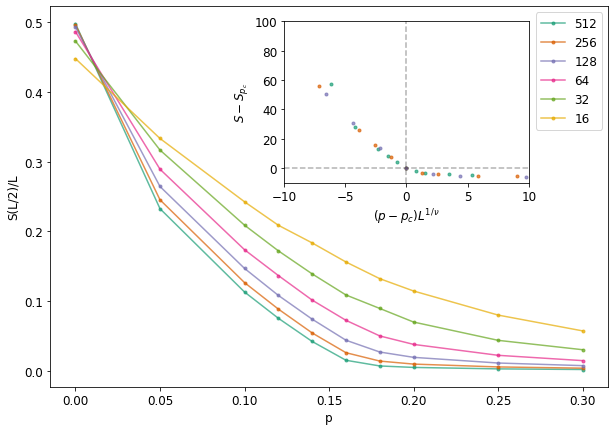

In [13]:
import matplotlib as mpl
# go here to get colourmaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Dark2.colors)

fig, ax1 = plt.subplots(figsize=(10,7))
plt.rcParams.update({'font.size': 12})

left, bottom, width, height = [0.45, 0.53, 0.34, 0.32]
ax2 = fig.add_axes([left, bottom, width, height])

pc = 0.16
nu = 1.33

# ps_norm = np.outer(ps-np.repeat(pc,len(ps)), np.power(Ls,1/nu))
# entspc = ents_1d_density[:,np.where(np.array(ps) == pc)[0][0]] # ent at pc
# ents_norm = ents_1d_density - np.tile(entspc.T,(10,1)).T

ps_norm = np.outer(ps-np.repeat(pc,len(ps)), np.power(Ls,1/nu))
entspc = ents_1d[:,np.where(np.array(ps) == pc)[0][0]] # ent at pc
ents_norm = ents_1d - np.tile(entspc.T,(10,1)).T

ax1.plot(ps, np.fliplr(ents_1d_density.T)[:,:-1], '.-', alpha=0.7)
ax1.legend(np.flip(Ls))
ax1.set_xlabel('p')
ax1.set_ylabel('S(L/2)/L')

ax2.plot(ps_norm[:,4:], ents_norm.T[:,4:], '.', alpha=0.7)
ax2.set_xlabel(r'$(p-p_c)L^{1/\nu}$')
ax2.set_ylabel(r'$S-S_{p_c}$')
ax2.axvline(x=0, color='black', linestyle='--', alpha=0.3)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.3)
ax2.set_ylim([-10,100])
ax2.set_xlim([-10,10])

# ax2.plot(ps, np.fliplr(ents_1d_density.T)[:,:2], '.-')
# ax2.legend(np.flip(Ls)[:2])

# plt.show()
# plt.savefig('fig_ent1D_dens.pdf')

### obc  - larger run, running each L size system out to 2L. single cut of size L/2

In [ ]:
Ls = [16, 24, 32, 40, 48, 64, 128]
ps = [0.1, 0.12, 0.14, 0.15, 0.16, 0.17, 0.18, 0.2, 0.25]

ents_1d = np.zeros((len(Ls), len(ps)), dtype='float64')
for i in range(len(Ls)):
    for j in range(len(ps)):
        infile = open('ent_1d_obc/L' + str(Ls[i]) + '_p' + str(ps[j]), 'rb')
        ent = pickle.load(infile)
        infile.close()
        #print(Ls[i], ps[j], ent.shape)
        ents_1d[i,j] = np.mean(np.mean(ent, axis=0)[-Ls[i]//4:])

ents_1d_density = ents_1d / np.array(Ls)[:, None]

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(Ls, ents_1d, '.-')
plt.xlabel('L')
plt.ylabel('S')
plt.title('entropy vs. system size')
plt.legend(ps)
plt.subplot(1,2,2)
plt.plot(ps, ents_1d_density.T, '.-')
plt.xlabel('p')
plt.ylabel('S/L')
plt.title('entropy density vs. p')
plt.legend(Ls)
plt.show()

print(ents_1d[0,:])
